# Chapter 1: Cohort analysis

## Data Description
### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


### Attribute Information:

* **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* **Description**: Product (item) name. Nominal.
* **Quantity**: The quantities of each product (item) per transaction. Numeric.
* **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* **Country**: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
online = pd.read_csv('online.csv', parse_dates = ['InvoiceDate'])
online = online.iloc[:,1:]
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [3]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.3+ MB


In [4]:
online.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.00000
mean,560639.843136,11.511233,3.063033,15552.19790
std,13176.494003,41.017582,31.894970,1595.50593
min,536365.000000,1.000000,0.001000,12747.00000
25%,549128.000000,2.000000,1.250000,14194.00000
50%,562012.500000,4.000000,1.950000,15525.00000
75%,572283.000000,12.000000,3.750000,16931.00000
max,581586.000000,4300.000000,8142.750000,18287.00000


In [5]:
online['InvoiceDate'].min(), online['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

# Building a Cohort table

In [6]:
def get_month(x): return dt.datetime(x.year, x.month, 1)  

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)  # Add the month from the date col
grouping = online.groupby('CustomerID')['InvoiceMonth']   
online['CohortMonth'] = grouping.transform('min')  # get the first month (frist invoice) for each customer
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [7]:
def get_date_int(df, column): 
    year = df[column].dt.year 
    month = df[column].dt.month 
    day = df[column].dt.day 
    return year, month, day 

In [8]:
# Get cohort index
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')  
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth') 
years_diff = invoice_year - cohort_year 
months_diff = invoice_month - cohort_month  
online['CohortIndex'] = years_diff * 12 + months_diff + 1 
online.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [9]:
cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique()
cohort_data = cohort_data.reset_index() 
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


In [10]:
cohort_counts = pd.pivot_table(cohort_data, index = 'CohortMonth', columns = 'CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cohort metrics

### Retention rate
Percentage of active customers / total customers

In [11]:
# Retention rate for every cohort
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis = 0)
round(retention,2)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.0,31.0,35.0,34.0,40.0,35.0,33.0,34.0,37.0,35.0,49.0,24.0
2011-01-01,100.0,21.0,25.0,24.0,33.0,27.0,25.0,26.0,31.0,31.0,37.0,14.0,NaN
2011-02-01,100.0,18.0,18.0,26.0,27.0,23.0,25.0,26.0,27.0,30.0,9.0,NaN,NaN
2011-03-01,100.0,16.0,26.0,20.0,21.0,17.0,25.0,22.0,28.0,10.0,NaN,NaN,NaN
2011-04-01,100.0,19.0,20.0,19.0,18.0,20.0,22.0,23.0,7.0,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.0,17.0,14.0,21.0,23.0,24.0,9.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.0,13.0,20.0,24.0,30.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.0,18.0,22.0,25.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.0,20.0,25.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


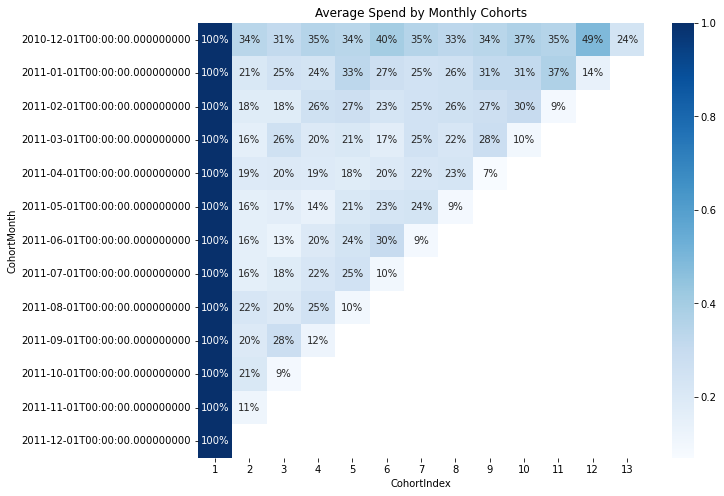

In [12]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(retention.round(2), annot=True,fmt = '.0%', cmap='Blues')
plt.show()

### Average quantity for each cohort

In [13]:
cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean()
cohort_data = cohort_data.reset_index() 
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,11.111588
1,2010-12-01,2,12.260241
2,2010-12-01,3,12.152314
3,2010-12-01,4,13.228676
4,2010-12-01,5,13.669839


In [14]:
avg_quantity = pd.pivot_table(cohort_data, index = 'CohortMonth', columns = 'CohortIndex', values='Quantity')
avg_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


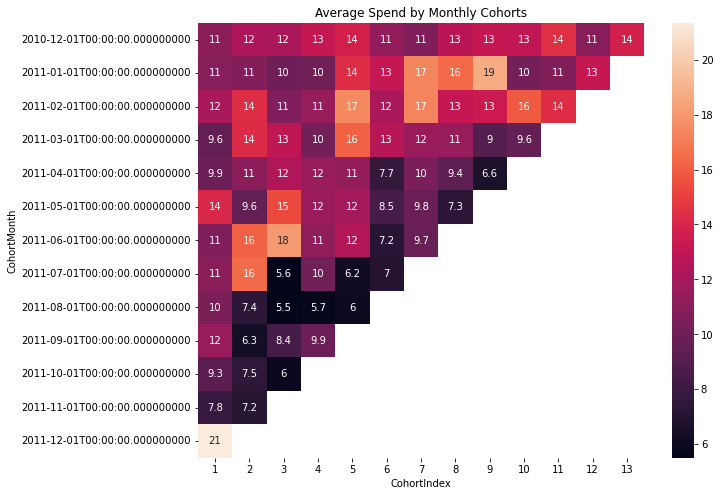

In [15]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(avg_quantity.round(2), annot=True, cmap='rocket')
plt.show()

# Chapter 2: Recency, frequency monetary (RFM) segmentation

## Definitions
* **Recency** - days since last customer transaction
* **Frequency** - number of transactions in the last 12 months
* **Monetary Value** - total spend in the last 12 months

## Data preparation
* Add `totalSum` column -> well be used when calculating M
* Assume the snapshot data is the day afer the last data in the dataset
    * when calculating R we usually work with recent data (snapshot date = data we calculate the R)

In [16]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1) 

In [17]:
# Aggregate data on a customer level 
datamart = online.groupby(['CustomerID']).agg({ 
                                                'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 
                                                'InvoiceNo': 'count', 
                                                'TotalSum': 'sum'}) 
# Rename columns for easier interpretation 
datamart.rename(columns = {'InvoiceDate': 'Recency', 
                           'InvoiceNo': 'Frequency', 
                           'TotalSum': 'MonetaryValue'}, inplace=True)  
# Check the first rows 
datamart.head() 

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


## Split customers in Groups 
we will split the customers in 4 groups based on the previous metrics where the higher the group the better

In [18]:
datamart['R'] = pd.qcut(datamart['Recency'], 4, labels =  range(4,0,-1)) 
datamart['F'] = pd.qcut(datamart['Frequency'], 4, labels =  range(1,5)) 
datamart['M'] = pd.qcut(datamart['MonetaryValue'], 4, labels =  range(1,5))  
datamart.head() 

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


## RFM segment & RFM Score
* segment -> concatenated R, F, M groups together (ex : 444, 233)
* score -> sum of the segment with min = 3 and max = 12 (ex:12, 8)

In [19]:
datamart['RFM_Segment'] = datamart.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)  
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1) 
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,4.04.04.0,12
12748,1,967,7522.06,4,4,4,4.04.04.0,12
12749,4,37,813.45,4,4,4,4.04.04.0,12
12820,3,17,268.02,4,3,3,4.03.03.0,10
12822,71,9,146.15,2,2,3,2.02.03.0,7


In [20]:
datamart['RFM_Segment'] = datamart['RFM_Segment'].str.replace(r'.0', '', regex=True)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12
12748,1,967,7522.06,4,4,4,444,12
12749,4,37,813.45,4,4,4,444,12
12820,3,17,268.02,4,3,3,433,10
12822,71,9,146.15,2,2,3,223,7


### Analyzing RFM segments

In [21]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


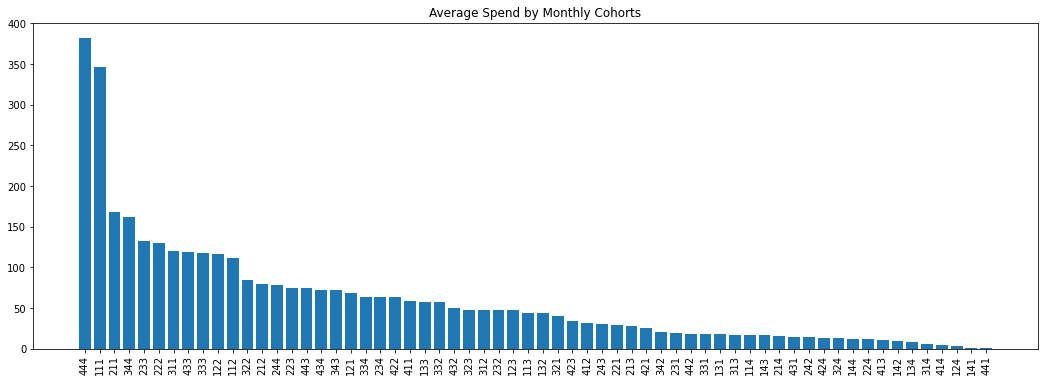

In [22]:
d_sizes = datamart.groupby('RFM_Segment').size().sort_values(ascending=False)
# Initialize an 8 by 6 inches plot figure

plt.figure(figsize=(18, 6))
plt.bar(d_sizes.index, d_sizes)

plt.title('Average Spend by Monthly Cohorts')
plt.xticks(rotation = 90)
plt.show()

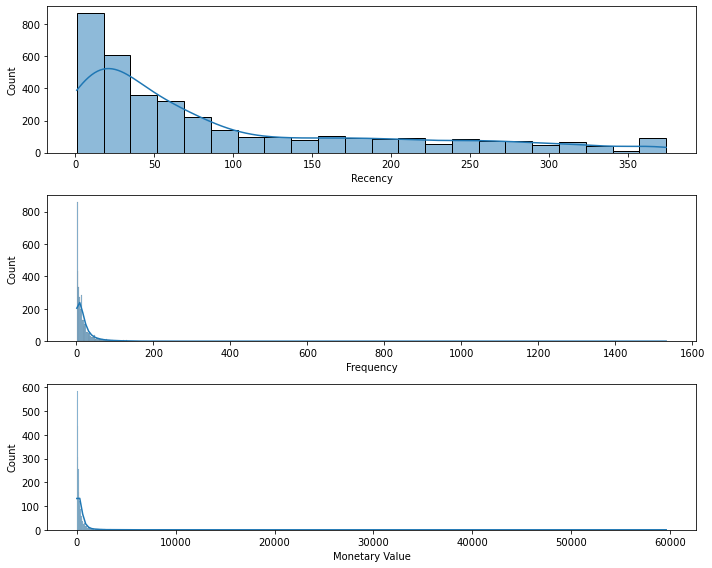

In [23]:
fig, ax = plt.subplots(3,1,figsize=(10, 8)) 
sns.histplot(datamart['Recency'], kde = True, ax = ax[0]).set_xlabel("Recency")
sns.histplot(datamart['Frequency'], kde = True, ax = ax[1]).set_xlabel("Frequency")
sns.histplot(datamart['MonetaryValue'], kde = True, ax = ax[2]).set_xlabel("Monetary Value")
fig.tight_layout() # Adjust the padding between and around subplots.

plt.show();

In [24]:
# Find the mean and size of each segment
datamart.groupby('RFM_Score').agg({ 
                                    'Recency': 'mean', 
                                    'Frequency': 'mean', 
                                    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           256.7       2.0          28.5   346
4           175.7       3.2          48.0   348
5           145.3       4.3          79.6   406
6           105.4       6.4         149.4   433
7            82.8       8.9         163.1   384
8            63.4      12.8         198.6   382
9            48.4      16.8         330.0   347
10           32.9      24.5         438.8   364
11           21.6      38.8         709.4   309
12            7.6      77.3        1709.0   382

In [25]:
# Grouping into named segments
def segment_me(df): 
    if df['RFM_Score'] >= 9: 
        return 'Gold' 
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9): 
        return 'Silver' 
    else: 
        return 'Bronze' 
    
datamart['General_Segment'] = datamart.apply(segment_me, axis=1) 

In [26]:
# Find the mean and size of each segment
datamart.groupby('General_Segment').agg({ 
                                    'Recency': 'mean', 
                                    'Frequency': 'mean', 
                                    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            216.1       2.6          38.3   694
Gold               27.4      40.1         817.6  1402
Silver            100.1       8.0         146.7  1605

# Chapter 3: Data pre-processing for clustering

### K-means Assumptions:
1. Symmetric distribution of variables (not skewed)
2. Variables with same average values
3. Variables with same variance

None of these assumptions are met within our dataset so we need to change that


In [27]:
datamart_rfm = datamart.iloc[:,:3]
datamart_rfm.head(2)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06


In [28]:
# Unskew the data 
datamart_log = np.log(datamart_rfm)  
 
# Normalize the variables 
scaler = StandardScaler() 
scaler.fit(datamart_log) 
 
# Store for clustering 
datamart_normalized = scaler.transform(datamart_log) 

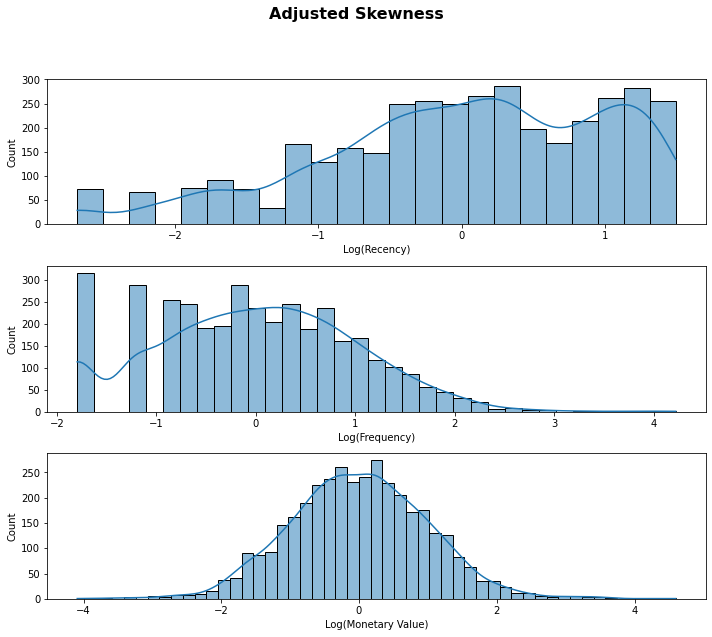

In [29]:
fig, ax = plt.subplots(3,1,figsize=(10, 8)) 
sns.histplot(datamart_normalized[:,0], kde = True, ax = ax[0]).set_xlabel("Log(Recency)")
sns.histplot(datamart_normalized[:,1], kde = True, ax = ax[1]).set_xlabel("Log(Frequency)")
sns.histplot(datamart_normalized[:,2], kde = True, ax = ax[2]).set_xlabel("Log(Monetary Value)")

fig.tight_layout() # Adjust the padding between and around subplots.
plt.suptitle("Adjusted Skewness", fontsize=16, fontweight ="bold", y = 1.1)
plt.show();

***Not perfect but better***
# Chapter 4: Customer Segmentation with K-means


### Key steps
* Data pre-processing (Already done)
* Choosing a number of clusters
* Running k-means clustering on pre-processed data
* Analyzing average RFM values of each cluster

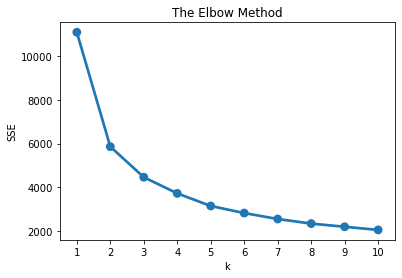

In [30]:
# Choosing a number of clusters
sse = {} 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(datamart_normalized) 
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center  
    
# Plot SSE for each *k* 
plt.title('The Elbow Method') 
plt.xlabel('k'); plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show() 

***This could work with 2 or 3 clusters***

In [31]:
# working with k = 2
kmeans = KMeans(n_clusters=2, random_state=1) 
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute 
cluster_labels = kmeans.labels_

# Create a cluster label column in the original DataFrame 
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels) 

# Calculate average RFM values and size for each cluster 
datamart_rfm_k2.groupby(['Cluster']).agg({ 
    'Recency': 'mean', 
    'Frequency': 'mean', 
    'MonetaryValue': ['mean', 'count'], 
}).round(0) 

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.0      36.0         730.0  1675
1         145.0       5.0          92.0  2026

In [32]:
# working with k = 3
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute 
cluster_labels = kmeans.labels_

# Create a cluster label column in the original DataFrame 
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels) 

# Calculate average RFM values and size for each cluster 
datamart_rfm_k3.groupby(['Cluster']).agg({ 
    'Recency': 'mean', 
    'Frequency': 'mean', 
    'MonetaryValue': ['mean', 'count'], 
}).round(0) 

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0      53.0        1128.0   855
1         172.0       3.0          55.0  1225
2          78.0      14.0         232.0  1621

**We can see that:**
* cluster 0 has the highest F, M and the lowest R
* cluster 1 has the highest R and the lowest F, M
* cluseter 2 has inbetween values for among the clusters

**We can visualize these findings**

### Snake plot

In [33]:
# Analyze customers behaviors with 3 clusters
datamart_normalized = pd.DataFrame(datamart_normalized,  
                                   index=datamart_rfm.index,  
                                   columns=datamart_rfm.columns) 
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
datamart_normalized.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,0
12748,-2.684553,3.845050,3.022433,0
12749,-1.706731,1.168000,1.331390,0
12820,-1.909647,0.530005,0.487337,0
12822,0.322128,0.008268,0.026297,2


In [34]:
datamart_normalized.describe().loc[['mean','std']]

,Recency,Frequency,MonetaryValue,Cluster
mean,2.040421e-16,8.864385e-17,1.584490e-16,1.206971
std,1.000135e+00,1.000135e+00,1.000135e+00,0.791417


In [35]:
datamart_melt = pd.melt(datamart_normalized.reset_index(),  
                    id_vars=['CustomerID', 'Cluster'], 
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],  
                    var_name='Attribute',  
                    value_name='Value') 
datamart_melt.head(5)

,CustomerID,Cluster,Attribute,Value
0,12747,0,Recency,-2.195642
1,12748,0,Recency,-2.684553
2,12749,0,Recency,-1.706731
3,12820,0,Recency,-1.909647
4,12822,2,Recency,0.322128


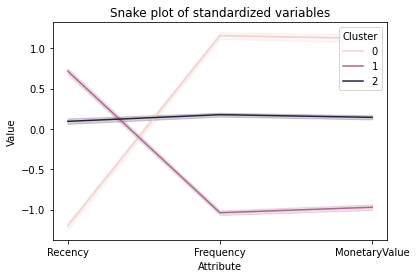

In [36]:
plt.title('Snake plot of standardized variables') 
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt) ;

### Relative importance of segment attributes
Useful technique to identify relative importance of each segment's atribute, Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned whencluster average equals population average) <br>
The further that ratio is from zero, the more important that attribute is for defining a specific cluster compared to the population average.

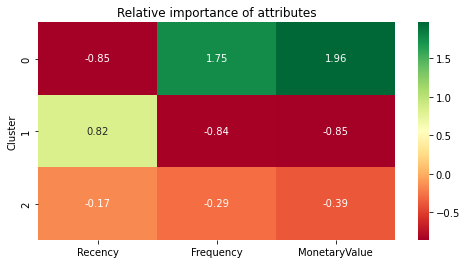

In [37]:
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()   # mean for R, F, M for each cluster
population_avg = datamart_rfm.mean()  # global mean for R, F, M
relative_imp = cluster_avg / population_avg - 1 

# Plot heatmap 
plt.figure(figsize=(8, 4)) 
plt.title('Relative importance of attributes') 
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn') 
plt.show() 

# Practice of different Dataset
### Key steps of the segmentation project
1. Gather data - updated data with an additional variable
2. Pre-process the data
3. Explore the data and decide on the number of clusters
4. Run k-means clustering
5. Analyze and visualize results

In [38]:
# Gather the data
df = pd.read_csv('datamart_rfmt.csv')
df.head()

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
0,12747,3,25,948.70,362
1,12748,1,888,7046.16,365
2,12749,4,37,813.45,214
3,12820,4,17,268.02,327
4,12822,71,9,146.15,88


In [39]:
df.describe().loc[['mean','std']]

,CustomerID,Recency,Frequency,MonetaryValue,Tenure
mean,15551.620642,90.43563,18.714247,370.694387,206.525117
std,1562.587958,94.44651,43.754468,1347.443451,112.702532


In [40]:
# Pre-process the data
df_rfmt = df.iloc[:,1:]

# Unskew the data 
df_log = np.log(df_rfmt)  
 
# Normalize the variables 
scaler = StandardScaler() 
scaler.fit(df_log) 
 
# Store for clustering 
df_normalized = scaler.transform(df_log) 

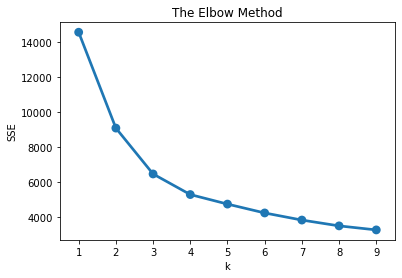

In [41]:
# Choosing a number of clusters
sse = {} 
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_normalized) 
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center  
    
# Plot SSE for each *k* 
plt.title('The Elbow Method') 
plt.xlabel('k'); plt.ylabel('SSE') 
sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
plt.show() 

In [42]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [43]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k3 = df.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k3.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          36.7       7.0         100.4   50.2   852
1         184.1       5.8         103.7  237.2  1367
2          32.6      38.2         788.7  270.6  1424

In [44]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [45]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = df.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)


Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          13.5      53.7        1142.8  279.6   777
1          33.0       7.2         101.0   45.2   750
2          89.0      15.0         276.7  247.5  1204
3         205.0       3.3          58.7  222.8   912

# Chapter 5: Customer Lifetime Value (CLV) basics.
how much a company expect to earn from a customer lifetime and there is some ways to calculate that
* **basic calculation:**..........CLV = Avg revenu * Profit margin * Avg lifespan<br>
* **granular calculation:**.......CLV = (Avg revenu per purchase * Avg Freq * Profit margin) * Avg lifespan<br>
* **traditional calculation:**.....CLV = Avg revenu * Profit margin * $\frac{retention rate}{churn rate}$

We will not include the profit in our calculation as we don't have it

In [47]:
# we will work with that table
online.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45


In [54]:
online.loc[0,'InvoiceDate']-dt.datetime(2011,11,1) 

Timedelta('-7 days +08:26:00')

In [48]:
# basic CLV calculation: Avg revenu * Avg lifespan

# Calculate average monthly spend per customers 
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()  
 
# Define lifespan to 36 months 
lifespan_months = 36 

# Calculate basic CLV 
clv_basic = monthly_revenue * lifespan_months  

# Print basic CLV value 
print('Average basic CLV is {:.1f} USD'.format(clv_basic)) 

Average basic CLV is 4774.6 USD


In [49]:
# granular CLV calculation: Avg revenu * (retention rate/ churn rate)
# Calculate average revenue per invoice 
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()  

# Calculate average number of unique invoices per customer per month 
freq = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()  

# Define lifespan to 36 months 
lifespan_months = 36 

# Calculate granular CLV 
clv_granular = revenue_per_purchase * freq * lifespan_months 

# Print granular CLV value 
print('Average granular CLV is {:.1f} USD'.format(clv_granular)) 

Average granular CLV is 1635.2 USD


In [50]:
# traditional CLV calculation: Avg revenu per purchase * Avg Freq * Avg lifespan

# Calculate monthly spend per customer 
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()  

# Calculate average monthly retention rate 
retention_rate = retention.iloc[:,1:].mean().mean()  # Calculate average monthly churn rate 
churn_rate = 1 - retention_rate 

# Calculate traditional CLV  
clv_traditional = monthly_revenue * (retention_rate / churn_rate)  

# Print traditional CLV and the retention rate values 
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format( 
                    clv_traditional, retention_rate*100)) 

Average traditional CLV is 42.4 USD at 24.2 % retention_rate
